# Time series I
Cenying (Tracy) Yang (cenying.yang@cityu.edu.hk)

Department of Information Systems

City University of Hong Kong

#### Statsmodels is a library that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

#### Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations.

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from matplotlib import pyplot as plt
# a magic function that renders the figure in a notebook
%matplotlib inline

## 1. Shampoo sales

In [2]:
# read csv file
shampoo = pd.read_csv('shampoo_sales.csv')
print(shampoo.head())

       Date  Sales
0  1/1/2020  266.0
1  2/1/2020  145.9
2  3/1/2020  183.1
3  4/1/2020  119.3
4  5/1/2020  180.3


Text(0.5, 1.0, 'Daily shampoo sales')

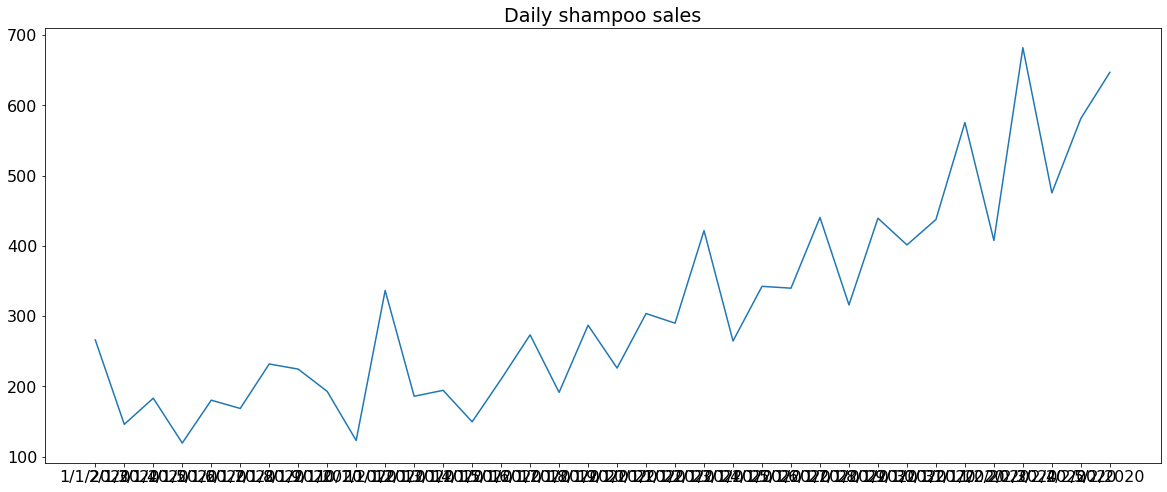

In [22]:
# plot the time series data
plt.figure(figsize = (20,8))
plt.plot(shampoo['Date'], shampoo['Sales'])
plt.title('Daily shampoo sales')

### Do you observe any trend or seasonality? 

#### There is a clear upward trend but no seasonality. So Holt linear model (exponential smoothing + trend) may be appropriate. But let's try different models anyway. 

In [9]:
# first split our data into training and test
train = shampoo[:-5]
test = shampoo[-5:]
train.shape, test.shape

((31, 2), (5, 2))

Text(0.5, 1.0, 'Daily shampoo sales')

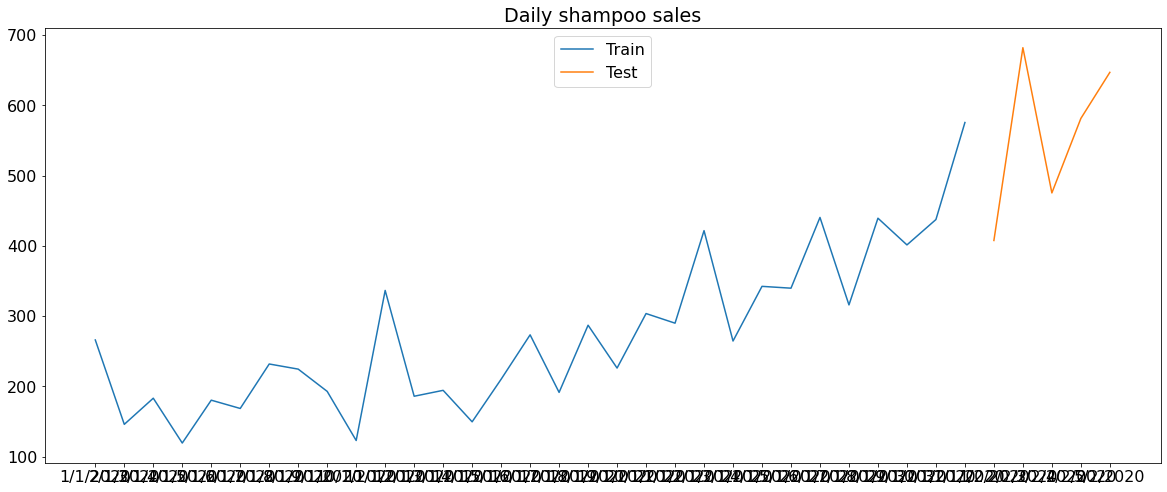

In [21]:
# plot training and testing data
plt.figure(figsize = (20,8))
plt.plot(train['Date'], train['Sales'], label = 'Train')
plt.plot(test['Date'], test['Sales'], label = 'Test')
plt.legend(loc = 'upper center')
plt.title('Daily shampoo sales')


### 1.1 Simple moving average

C:\Users\ugz20\AppData\Local\Temp\ipykernel_26504\192462780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['moving_average_forecast5'] = train['Sales'].rolling(5).mean().iloc[-1] # get the last value of the moving average


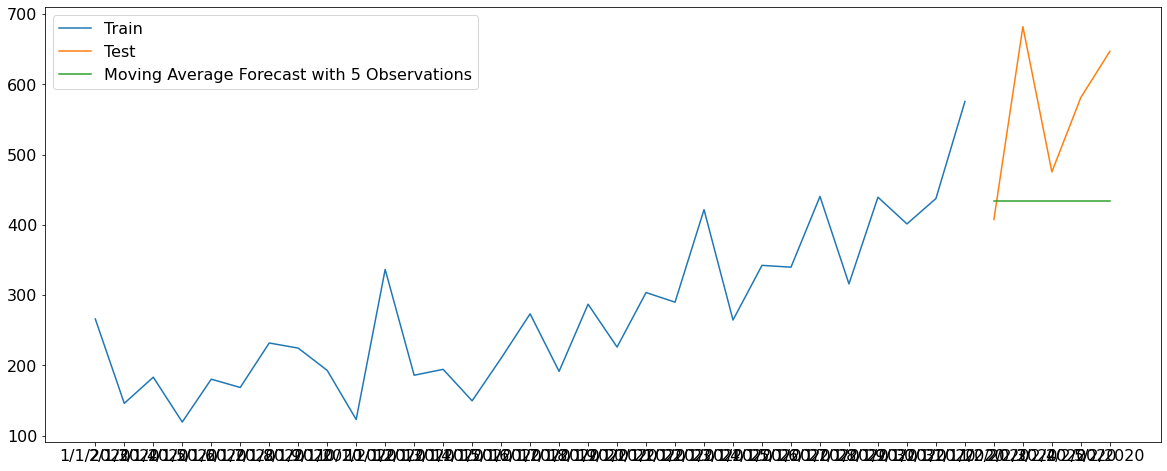

In [20]:
# moving average with 5, 10, and 15 windows
test['moving_average_forecast5'] = train['Sales'].rolling(5).mean().iloc[-1] # get the last value of the moving average
plt.figure(figsize = (20,8))
plt.plot(train['Date'], train['Sales'], label = 'Train')
plt.plot(test['Date'], test['Sales'], label = 'Test')
plt.plot(test['Date'], test['moving_average_forecast5'], label = 'Moving Average Forecast with 5 Observations')
plt.legend(loc = 'upper left')
plt.show()

C:\Users\ugz20\AppData\Local\Temp\ipykernel_26504\4091662583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['moving_average_forecast10'] = train['Sales'].rolling(10).mean().iloc[-1]


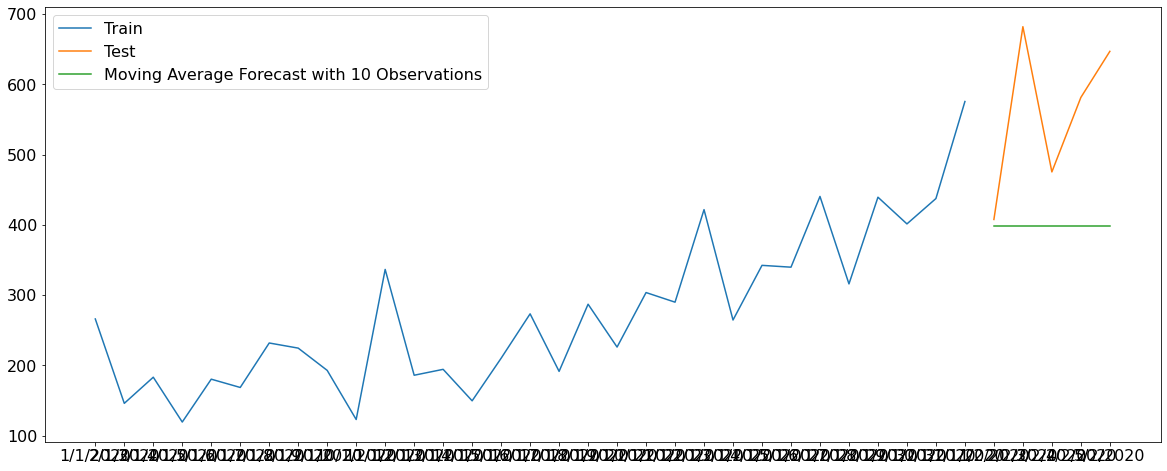

C:\Users\ugz20\AppData\Local\Temp\ipykernel_26504\4091662583.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['moving_average_forecast15'] = train['Sales'].rolling(15).mean().iloc[-1]


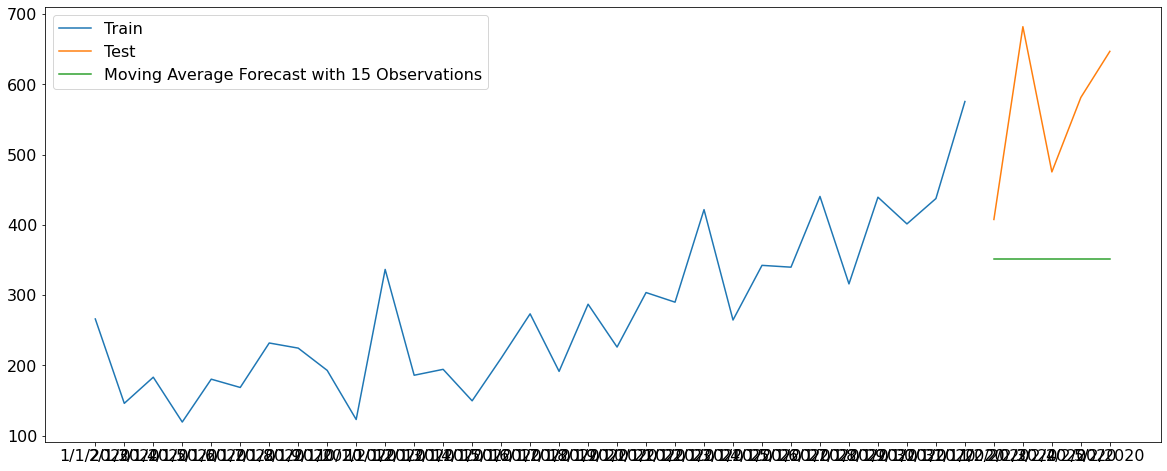

In [19]:
# M = 10
test['moving_average_forecast10'] = train['Sales'].rolling(10).mean().iloc[-1]
plt.figure(figsize = (20,8))
plt.plot(train['Date'], train['Sales'], label = 'Train')
plt.plot(test['Date'], test['Sales'], label = 'Test')
plt.plot(test['Date'], test['moving_average_forecast10'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'upper left')
plt.show()
# M =15
test['moving_average_forecast15'] = train['Sales'].rolling(15).mean().iloc[-1]
plt.figure(figsize = (20,8))
plt.plot(train['Date'], train['Sales'], label = 'Train')
plt.plot(test['Date'], test['Sales'], label = 'Test')
plt.plot(test['Date'], test['moving_average_forecast15'], label = 'Moving Average Forecast with 15 Observations')
plt.legend(loc = 'upper left')
plt.show()

In [23]:
# get rmse of moving average with 5, 10, and 15 windows on test data
rmse_sma5 = metrics.mean_squared_error(y_pred=test['moving_average_forecast5'],
                                       y_true=test['Sales'], squared = False)
rmse_sma10 = metrics.mean_squared_error(y_pred=test['moving_average_forecast10'],
                                       y_true=test['Sales'], squared = False)
rmse_sma15 = metrics.mean_squared_error(y_pred=test['moving_average_forecast15'],
                                       y_true=test['Sales'], squared = False)
print(rmse_sma5)
print(rmse_sma10)
print(rmse_sma15)

161.91353618521214
191.1078609058246
231.22183201419364


### 1.2 Simple exponential smoothing

In [24]:
ses = ETSModel(train['Sales'])
ses_fit = ses.fit()
y_predict = ses_fit.forecast(5)

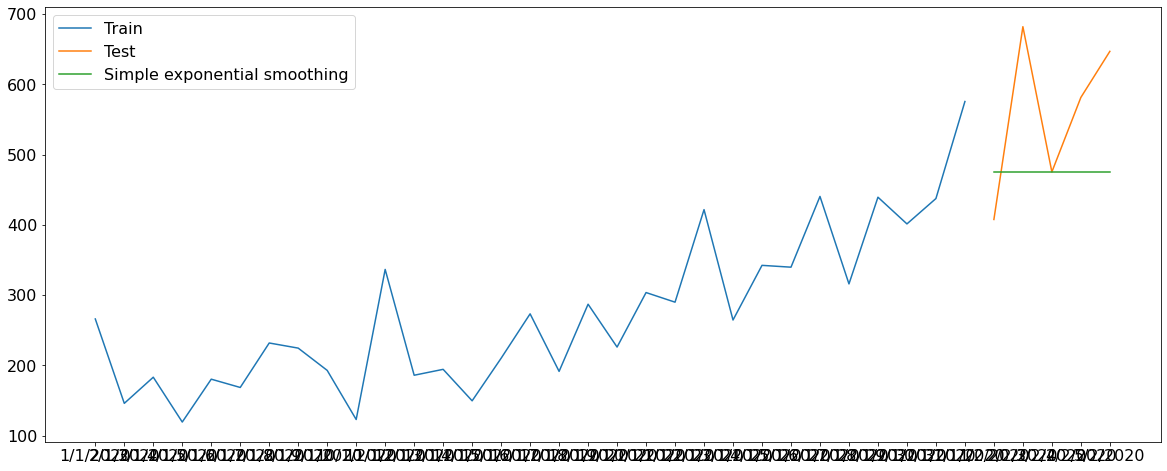

In [25]:
plt.figure(figsize = (20,8))
plt.plot(train['Date'], train['Sales'], label = 'Train')
plt.plot(test['Date'], test['Sales'], label = 'Test')
plt.plot(test['Date'], y_predict, label = 'Simple exponential smoothing')
plt.legend(loc = 'upper left')
plt.show()

In [26]:
rmse_ses = metrics.mean_squared_error(y_pred=y_predict,
                                       y_true=test['Sales'], squared = False)
print(rmse_ses)

132.54543401090322


### 1.3 Holt Linear

In [27]:
holt = ETSModel(train['Sales'], trend='add')
holt_fit = holt.fit()
y_predict = holt_fit.forecast(5)

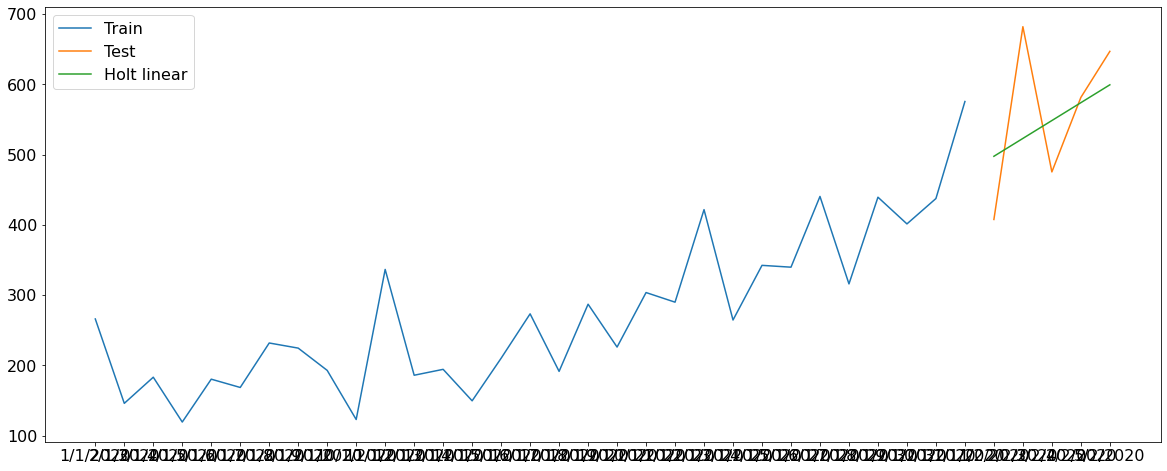

In [28]:
plt.figure(figsize = (20,8))
plt.plot(train['Date'], train['Sales'], label = 'Train')
plt.plot(test['Date'], test['Sales'], label = 'Test')
plt.plot(test['Date'], y_predict, label = 'Holt linear')
plt.legend(loc = 'upper left')
plt.show()

In [16]:
rmse_holt = metrics.mean_squared_error(y_pred=y_predict,
                                       y_true=test['Sales'], squared = False)

90.60612055227362


### 1.3 Holt Linear dampled

In [31]:
holt_d = ETSModel(train['Sales'], trend='add', damped_trend = True)
holt_d_fit = holt_d.fit()
y_predict = holt_d_fit.forecast(5)

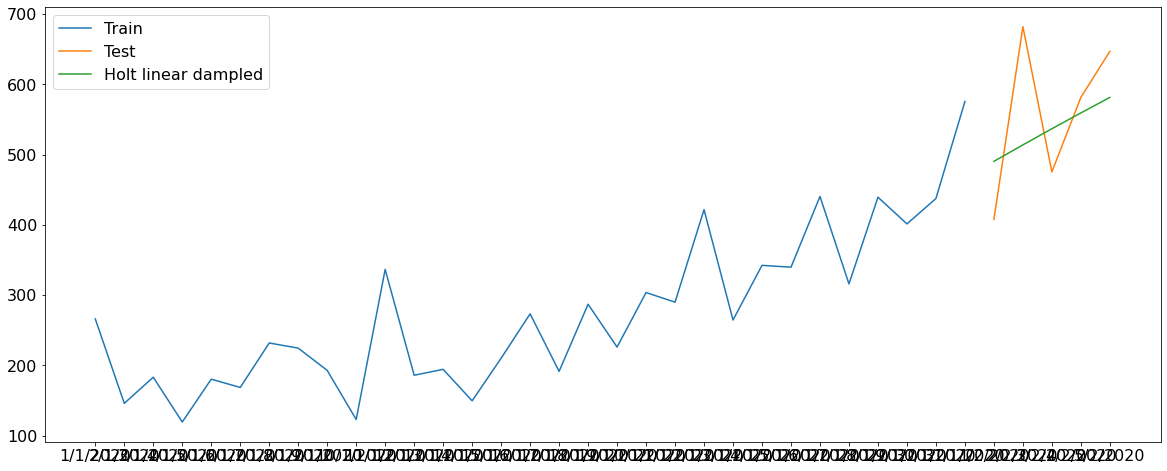

In [32]:
plt.figure(figsize = (20,8))
plt.plot(train['Date'], train['Sales'], label = 'Train')
plt.plot(test['Date'], test['Sales'], label = 'Test')
plt.plot(test['Date'], y_predict, label = 'Holt linear dampled')
plt.legend(loc = 'upper left')
plt.show()

In [33]:
rmse_holt_damped = metrics.mean_squared_error(y_pred=y_predict,
                                       y_true=test['Sales'], squared = False)
print(rmse_holt_damped)

93.49727944918219


## 2. Cardiovascular deaths (CVD)

In [35]:
# import the data
cvd = pd.read_csv('CVD.csv')
print(cvd.head())

   year  quarter   cvd
0  1987        1  4761
1  1987        2  4217
2  1987        3  3950
3  1987        4  4639
4  1988        1  5354


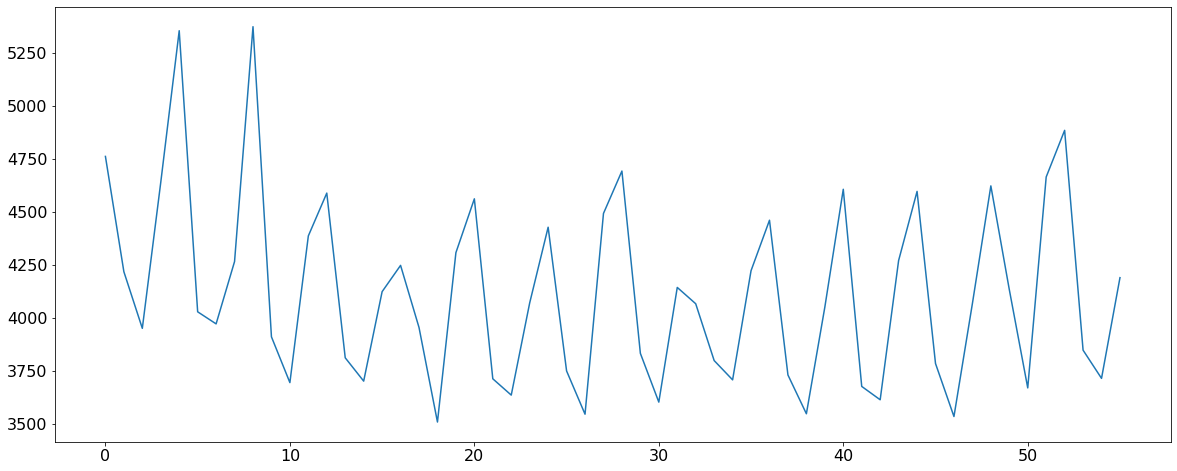

In [36]:
# plot the data
plt.figure(figsize = (20,8))
plt.plot(cvd['cvd'])

### Let us try different exponential smoothing methods

In [37]:
# let's first split our data into 90% training and 10% testing
N_train = int(0.9*cvd.shape[0])
N_test = cvd.shape[0] - N_train
print(N_train)
print(N_test)

50
6


In [38]:
cvd_train = cvd[:N_train] # take first N_train (50) data as trainig data
cvd_test = cvd[N_train:] # the remaining N_test (6) data as test data

Text(0.5, 1.0, 'Quarterly cardiovascular deaths, 1987 - 2000')

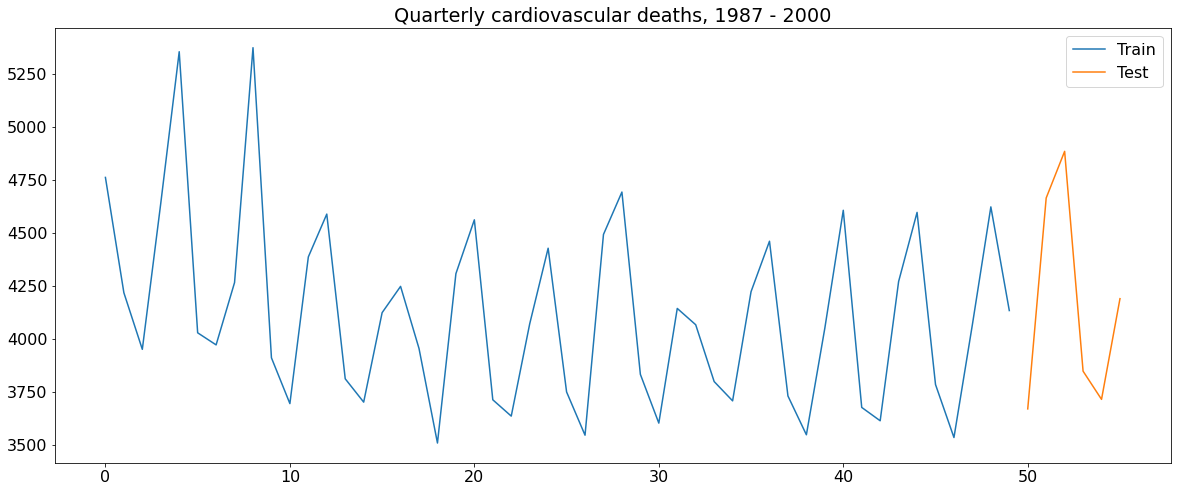

In [39]:
plt.figure(figsize = (20,8))
plt.plot(cvd_train['cvd'], label = 'Train')
plt.plot(cvd_test['cvd'], label = 'Test')
plt.legend(loc = 'upper right')
plt.title('Quarterly cardiovascular deaths, 1987 - 2000')

### 2.1 Simple exponential smoothing

In [40]:
ses = ETSModel(cvd_train['cvd'].astype('float64')) # convert integer into float
ses_fit = ses.fit()
y_predict = ses_fit.forecast(N_test)

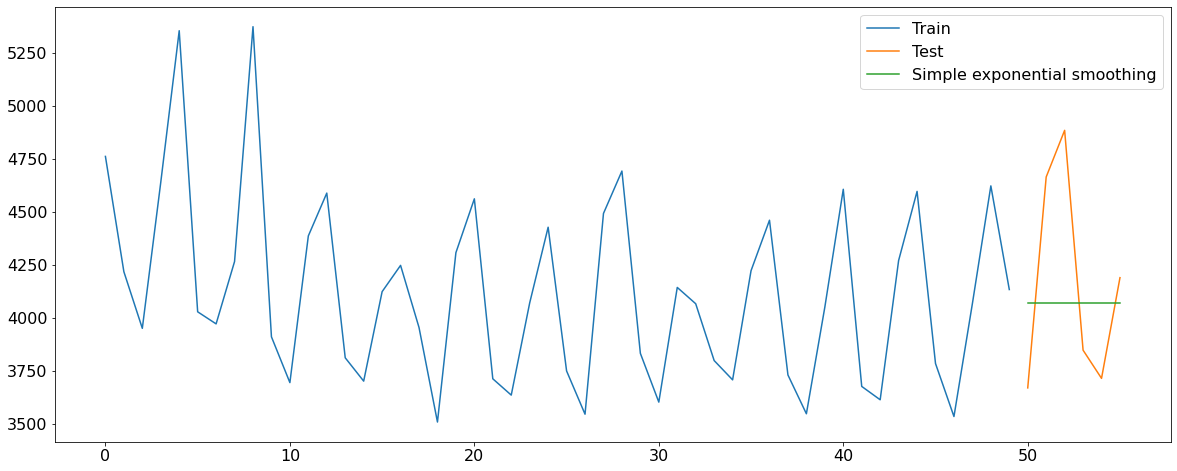

In [41]:
plt.figure(figsize = (20,8))
plt.plot(cvd_train['cvd'], label = 'Train')
plt.plot(cvd_test['cvd'], label = 'Test')
plt.plot(y_predict, label = 'Simple exponential smoothing')
plt.legend(loc = 'upper right')
plt.show()

In [31]:
rmse_ses = metrics.mean_squared_error(y_pred=y_predict,
                                       y_true=cvd_test['cvd'], squared = False)
print(rmse_ses)

477.630289222993


### 2.2 Holt linear

[Exercise] \
    1. Please try Holt Linear model with no damping. \
    2. Plot the figure that shows training data, test data, and predicted data. \
    3. Get the RMSE on the test data. \
[Hint] Specify the column `cvd` as "float64" type.

In [44]:
holt_cvd = ETSModel(cvd_train['cvd'].astype('float64'), trend='add')
holt_cvd_fit = holt_cvd.fit()
cvd_predicted = holt_cvd_fit.forecast(N_test)

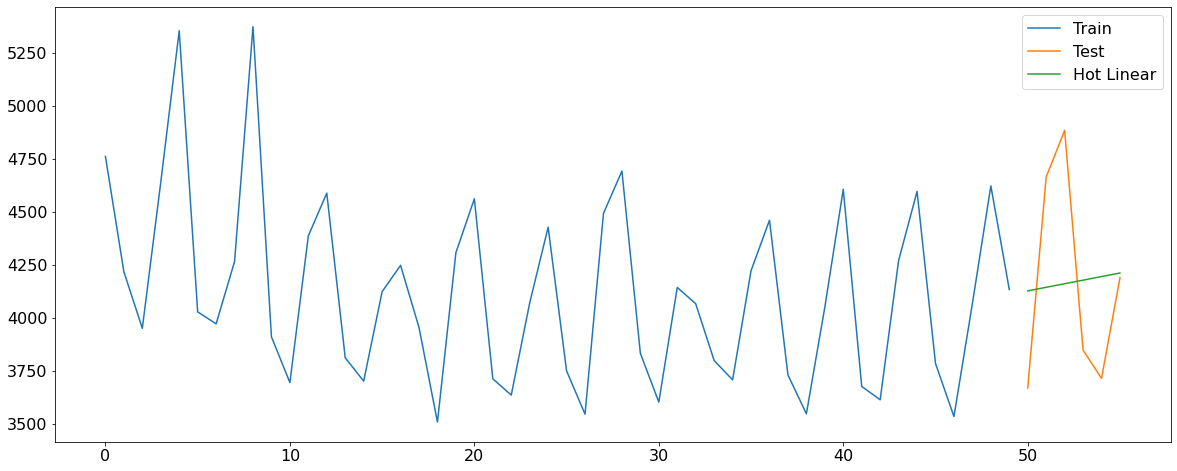

In [47]:
plt.figure(figsize = (20,8))
plt.plot(cvd_train['cvd'], label = 'Train')
plt.plot(cvd_test['cvd'], label = 'Test')
plt.plot(cvd_predicted, label = 'Hot Linear')
plt.legend(loc = 'upper right')
plt.show()

In [48]:
rmse_ses = metrics.mean_squared_error(y_pred=cvd_predicted,
                                       y_true=cvd_test['cvd'], squared = False)
print(rmse_ses)

473.2969977760252


### 2.3 Holt Winter

In [45]:
hw = ETSModel(cvd_train['cvd'].astype('float64'), trend='add', seasonal = 'add', seasonal_periods = 4)
hw_fit = hw.fit()
y_predict = hw_fit.forecast(N_test)

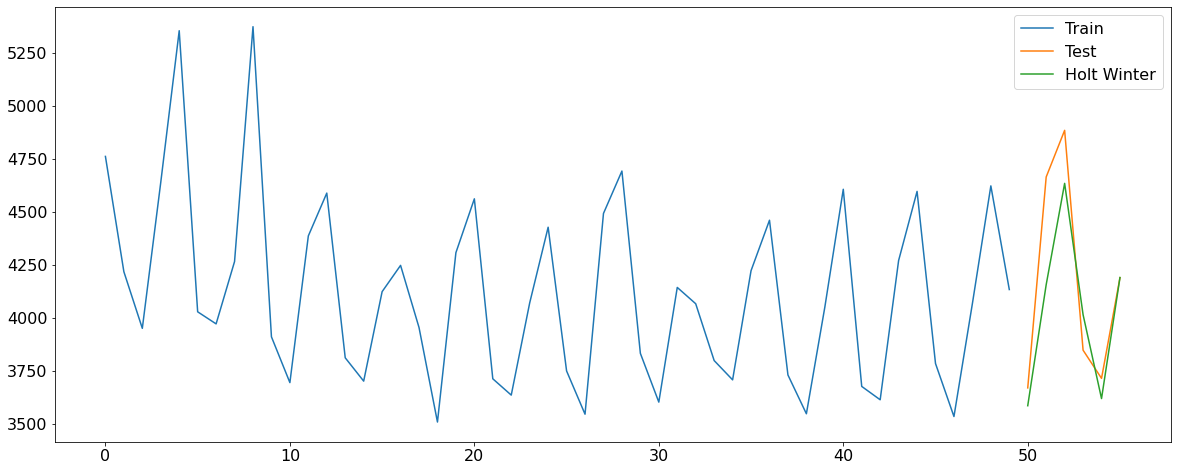

In [46]:
plt.figure(figsize = (20,8))
plt.plot(cvd_train['cvd'], label = 'Train')
plt.plot(cvd_test['cvd'], label = 'Test')
plt.plot(y_predict, label = 'Holt Winter')
plt.legend(loc = 'upper right')
plt.show()

In [49]:
rmse_hw = metrics.mean_squared_error(y_pred=y_predict,
                                       y_true=cvd_test['cvd'], squared = False)
print(rmse_hw)

246.58985664390008


### 2.4 Holt Winter damped

In [50]:
hw_d = ETSModel(cvd_train['cvd'].astype('float64'), trend='add', damped_trend = True, seasonal = 'add', seasonal_periods = 4)
hw_d_fit = hw_d.fit()
y_predict = hw_d_fit.forecast(N_test)

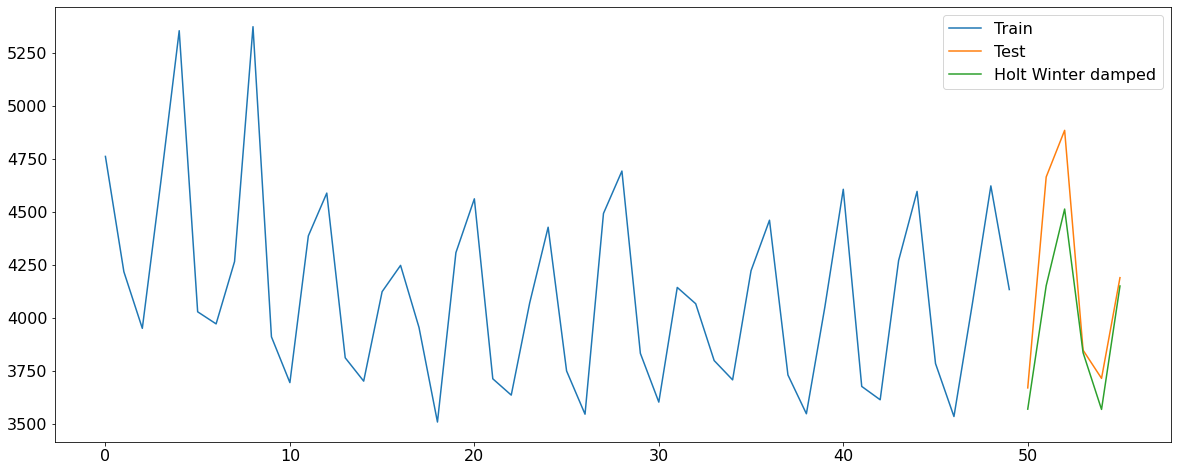

In [51]:
plt.figure(figsize = (20,8))
plt.plot(cvd_train['cvd'], label = 'Train')
plt.plot(cvd_test['cvd'], label = 'Test')
plt.plot(y_predict, label = 'Holt Winter damped')
plt.legend(loc = 'upper right')
plt.show()

In [52]:
rmse_hw_d = metrics.mean_squared_error(y_pred=y_predict,
                                       y_true=cvd_test['cvd'], squared = False)
print(rmse_hw_d)

268.9776371902643
